# Practical Deep Learning for Coders, v3

# Creating your own dataset from Google Images
# 从Google Images创建你自己的数据集


*作者: Francisco Ingham 和 Jeremy Howard. 灵感来源于[Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

在本教程中，我们将看到如何从Goolge Images中轻松地创建一个图片数据集。 **注意**：从Google搜集任何你想要的新品类，你都必须重复这些步骤（比如，狗的数据集，还有猫的数据集，你就得把这些步骤各执行一遍）。

In [1]:
from fastai.vision import *

## Get a list of URLs 获取URL的列表

### Search and scroll 搜索并翻看

打开[Google Images](http://images.google.com)页面，搜索你感兴趣的图片。你在搜索框中输入的信息越精确，那么搜索的结果就越好，而需要你手动处理的工作就越少。

往下翻页直到你看到所有你想下载的图片，或者直到你看到一个“显示更多结果”的按钮为止。你刚翻看过的所有图片都是可下载的。为了获得更多的图片，点击“显示更多结果”按钮，继续翻看。Goolge Images最多可以显示700张图片。

在搜索请求框中增加一些你想排除在外的信息是个好主意。比如，如果你要搜canis lupus lupus这一类欧亚混血狼，最好筛除掉别的种类（这样返回的结果才比较靠谱）

你也可以限制搜索的结果，让搜索结果只显示照片，通过点击*工具*从*Type*里选择*照片*进行下载。

### Download into file 下载到文件中

现在你需要在浏览器中运行一些javascript代码，浏览器将保存所有你想要放入数据集的图片的URL地址。

(浏览器窗口下)windows/linux系统按<kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd>，Mac系统按 <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd>,就会弹出javascript的“控制台”面板，在这个面板中，你可以把相关的javascript命令粘贴进去。

你需要获得每个图片对应的url。在运行下面的代码之前，你可能需要在Chrome中禁用广告拦截插件，否则window.open()函数将不能工作。然后你就可以运行下面的代码：

```javascript
 var urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
    var hiddenElement = document.createElement('a');
    hiddenElement.href = 'data:text/csv;charset=utf-8,' + encodeURI(urls.join('\n'));
    hiddenElement.target = '_blank';
    hiddenElement.download = 'myFile.csv';
    hiddenElement.click();
```

### 创建一个目录并将url文件上传到服务器上

为带标签的图片选择一个合适的名字，你可以多次执行下面的步骤来创建不同的标签。

In [2]:
folder = 'ginger'
file = 'ginger.csv'

In [ ]:
folder = 'potatoe'
file = 'potatoe.csv'

In [ ]:
#folder = 'grizzly'
#file = 'urls_grizzly.csv'

You will need to run this cell **once per each category**.<br>

下面的单元格，**每一个品种运行一次**。

In [3]:
path = Path('data/food')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [4]:
path.ls()

[PosixPath('data/food/ginger.csv'),
 PosixPath('data/food/ginger'),
 PosixPath('data/food/potatoe.csv')]

最后,上传你的url文件。你只需要在工作区点击“Upload”按钮，然后选择你要上传的文件，再点击“Upload”即可。

![](http://ml.xiniuedu.com/fastai/2/1.png)

## Download images 下载图片

现在，你要做的是从图片对应的url地址下载这些图片。

fast.ai提供了一个函数来完成这个工作。你只需要指定url地址文件名和目标文件夹，这个函数就能自动下载和保存可打开的图片。如果图片本身无法打开的话，对应图片也不会被保存.

我们开始下载图片吧！注意你可以设定需要下载的最大图片数量，这样我们就不会下载所有url地址了。

下面这行代码，**每一个品种运行一次**。

In [5]:
classes = ['ginger','potatoe']

In [9]:
import requests
proxies = {
  'http': 'http://127.0.0.1:12333',
  'https': 'http://127.0.0.1:1080',
}
requests.get('http://example.org', proxies=proxies)

<Response [200]>

In [10]:
download_images(path/file, dest, max_pics=200)

Error https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTNxF7waIkb8ugrCWwsUjmwii-UMAwg4wWGOmb5dahaauPItUsw&usqp=CAU HTTPSConnectionPool(host='encrypted-tbn0.gstatic.com', port=443): Max retries exceeded with url: /images?q=tbn%3AANd9GcTNxF7waIkb8ugrCWwsUjmwii-UMAwg4wWGOmb5dahaauPItUsw&usqp=CAU (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f24e6edf750>, 'Connection to encrypted-tbn0.gstatic.com timed out. (connect timeout=4)'))
Error https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQtjqUh5aWLepiKlz7AihxRyJlf4RHvdwbgPqoibXejBKOx3ld0&usqp=CAU HTTPSConnectionPool(host='encrypted-tbn0.gstatic.com', port=443): Max retries exceeded with url: /images?q=tbn%3AANd9GcQtjqUh5aWLepiKlz7AihxRyJlf4RHvdwbgPqoibXejBKOx3ld0&usqp=CAU (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f24e6edfe10>, 'Connection to encrypted-tbn0.gstatic.com timed out. (connect timeout=4)'))
Error https://encrypted-tbn0.gstatic.com/i

Error https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQXhv99ROilpz8ZcqStfN_lIqxq1rwByCH1OjVccETNJoaJ3xTm&usqp=CAU HTTPSConnectionPool(host='encrypted-tbn0.gstatic.com', port=443): Max retries exceeded with url: /images?q=tbn%3AANd9GcQXhv99ROilpz8ZcqStfN_lIqxq1rwByCH1OjVccETNJoaJ3xTm&usqp=CAU (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f255b613d90>, 'Connection to encrypted-tbn0.gstatic.com timed out. (connect timeout=4)'))
Error https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTdv4aLo6ttIEposRNVLsbFvDCrQoCUSaE2ETAWF43j8tDkSz1T&usqp=CAU HTTPSConnectionPool(host='encrypted-tbn0.gstatic.com', port=443): Max retries exceeded with url: /images?q=tbn%3AANd9GcTdv4aLo6ttIEposRNVLsbFvDCrQoCUSaE2ETAWF43j8tDkSz1T&usqp=CAU (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f24e6edff10>, 'Connection to encrypted-tbn0.gstatic.com timed out. (connect timeout=4)'))
Error https://encrypted-tbn0.gstatic.com/i

Error https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT2cj3_Wi6FveR6kxJ2QLx9cGZWe9e6IhWftmHEzdsDI8iDi4Mb&usqp=CAU HTTPSConnectionPool(host='encrypted-tbn0.gstatic.com', port=443): Max retries exceeded with url: /images?q=tbn%3AANd9GcT2cj3_Wi6FveR6kxJ2QLx9cGZWe9e6IhWftmHEzdsDI8iDi4Mb&usqp=CAU (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f24e6d22a10>, 'Connection to encrypted-tbn0.gstatic.com timed out. (connect timeout=4)'))
Error https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR0aLZ1A3ifo4oAQa4bpt4EJNHIStpzxahzUCdAXB-ZNKAYWvPi&usqp=CAU HTTPSConnectionPool(host='encrypted-tbn0.gstatic.com', port=443): Max retries exceeded with url: /images?q=tbn%3AANd9GcR0aLZ1A3ifo4oAQa4bpt4EJNHIStpzxahzUCdAXB-ZNKAYWvPi&usqp=CAU (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f24e6d22350>, 'Connection to encrypted-tbn0.gstatic.com timed out. (connect timeout=4)'))
Error https://encrypted-tbn0.gstatic.com/i

Error https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSw5AvAZ4Qt8zsCTTewOtdh-b9a1xcakDZLHoFDzCl5SpuQpLA-&usqp=CAU HTTPSConnectionPool(host='encrypted-tbn0.gstatic.com', port=443): Max retries exceeded with url: /images?q=tbn%3AANd9GcSw5AvAZ4Qt8zsCTTewOtdh-b9a1xcakDZLHoFDzCl5SpuQpLA-&usqp=CAU (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f25845cb7d0>, 'Connection to encrypted-tbn0.gstatic.com timed out. (connect timeout=4)'))
Error https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQqjZExAnMuynd6geCb3idYJCcWO7wWeTW_pGGIi3mhm3sOvVr0&usqp=CAU HTTPSConnectionPool(host='encrypted-tbn0.gstatic.com', port=443): Max retries exceeded with url: /images?q=tbn%3AANd9GcQqjZExAnMuynd6geCb3idYJCcWO7wWeTW_pGGIi3mhm3sOvVr0&usqp=CAU (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f24e698b110>, 'Connection to encrypted-tbn0.gstatic.com timed out. (connect timeout=4)'))
Error https://encrypted-tbn0.gstatic.com/i

Error https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQNLvb4NHzTflPMpN-JwyMi43WlCCX7tsjrOmjrp0uO14UjEA6R&usqp=CAU HTTPSConnectionPool(host='encrypted-tbn0.gstatic.com', port=443): Max retries exceeded with url: /images?q=tbn%3AANd9GcQNLvb4NHzTflPMpN-JwyMi43WlCCX7tsjrOmjrp0uO14UjEA6R&usqp=CAU (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f24e6d22590>, 'Connection to encrypted-tbn0.gstatic.com timed out. (connect timeout=4)'))
Error https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQWMSEMSZfrdexLHX1byvXc08MTgmHwMIcxYFjzvQ07JRoMZ0MX&usqp=CAU HTTPSConnectionPool(host='encrypted-tbn0.gstatic.com', port=443): Max retries exceeded with url: /images?q=tbn%3AANd9GcQWMSEMSZfrdexLHX1byvXc08MTgmHwMIcxYFjzvQ07JRoMZ0MX&usqp=CAU (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f24e6d22950>, 'Connection to encrypted-tbn0.gstatic.com timed out. (connect timeout=4)'))
Error https://encrypted-tbn0.gstatic.com/i

In [ ]:
# If you have problems download, try with `max_workers=0` to see exceptions:
download_images(path/file, dest, max_pics=20, max_workers=0)

Then we can remove any images that can't be opened: <br>

然后我们可以删除任何不能打开的图片:

In [12]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

ginger


potatoe


## View data 浏览数据

In [13]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
# If you already cleaned your data, run this cell instead of the one before
# 如果你已经清洗过你的数据,直接运行这格代码而不是上面的
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

好！我们浏览一些照片。

In [14]:
data.classes

['ginger', 'potatoe']

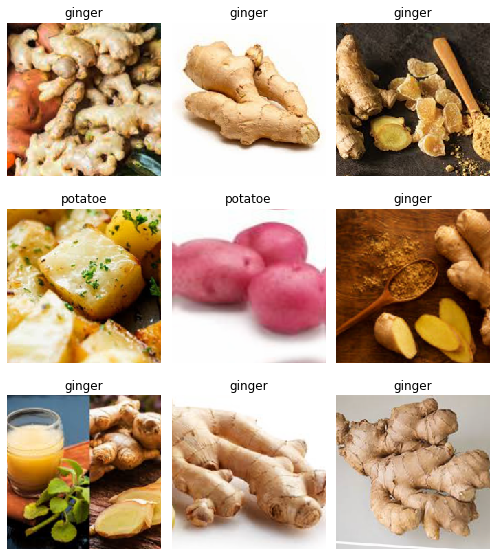

In [15]:
data.show_batch(rows=3, figsize=(7,8))

In [16]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['ginger', 'potatoe'], 2, 69, 17)

## Train model 训练模型

In [17]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [18]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.310837,1.231617,0.470588,00:02
1,1.329139,1.769399,0.352941,00:00
2,1.029230,1.708439,0.352941,00:00
3,0.805295,1.438907,0.352941,00:00


In [19]:
learn.save('stage-1')

In [20]:
learn.unfreeze()

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


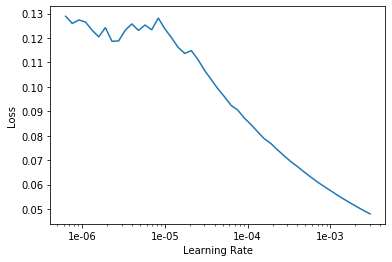

In [22]:
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.056158,0.794517,0.235294,00:01
1,0.038697,0.802269,0.235294,00:00


In [32]:
learn.save('stage-2')

## Interpretation 结果解读

In [33]:
learn.load('stage-2');

In [34]:
interp = ClassificationInterpretation.from_learner(learn)

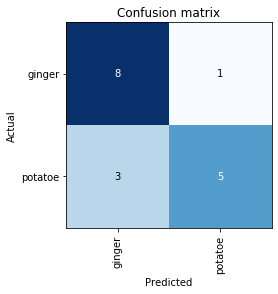

In [35]:
interp.plot_confusion_matrix()

## Cleaning Up 清理

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.<br>

某些最大误差，不是由于模型的性能差导致的，而是由于数据集中的有些图片本身存在问题才导致的。

从`fastai.widgets`库中导入并使用`ImageCleaner`小工具，我们就可以剔除那些归类错误的图片，从而减少预测失误。

In [36]:
from fastai.widgets import *

首先，我们可以借助`.from_toplosses`，从top_losses中获取我们需要的文件路径。随后喂给`ImageCleaner`误差高的索引以及对应的数据集参数。

需要注意的是，这些小工具本身并不会直接从磁盘删除图片，它会创建一个新的csv文件`cleaned.csv`，通过这个文件，你可以新创建一个包含准确标签信息的ImageDataBunch（图片数据堆），并继续训练你的模型。

为了清空整个图片集，我们需要创建一个新的未经分拆的数据集。视频课程里演示的`ds_type` 参数的用法已经不再有效。参照 [the thread](https://forums.fast.ai/t/duplicate-widget/30975/10) 来获取更多细节。

In [59]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [60]:
# If you already cleaned your data using indexes from `from_toplosses`,<br><br>
# 如果你已经从`from_toplosses`使用indexes清理了你的数据
# run this cell instead of the one before to proceed with removing duplicates.<br><br>
# 运行这个单元格里面的代码(而非上面单元格的内容)以便继续删除重复项
# Otherwise all the results of the previous step would be overwritten by<br><br>
# 否则前一个步骤中的结果都会被覆盖
# the new run of `ImageCleaner`.<br><br>
# 下面就是要运行的`ImageCleaner`代码,请把下面的注释去掉开始运行

# db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
#                    .no_split()
#                    .label_from_df()
#                    .transform(get_transforms(), size=224)
#                    .databunch()
#      )

接下来，我们要创建一个新的学习器来使用包含全部图片的新数据堆。

In [61]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [62]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

确保你在Jupyter Notebook环境下运行这个notebook，而不是在Jupyter Lab中运行。我们可以通过[/tree](/tree)来访问（notebook），而不是[/lab](/lab)。[目前还不支持](https://github.com/fastai/fastai/issues/1539)在Jupyter Lab中运行`ImageCleaner`小工具。<br>

In [63]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

点击“Delete”标记待删除的照片，然后再点击“Next Batch”来删除已标记的照片，同时保持其他图片仍在原来的位置。`ImageCleaner`将显示一行新的图片，直到没有更多的图片可以展示。在这种情况下，小工具程序会为你展示图片，直到从`top_losses.ImageCleaner(ds, idxs)`没有更多图片输出为止。

你会发现在你的数据集中存在重复图片，一定要删除他们！为了做到这一点，你需要运行`.from_similars`来获取有潜在重复可能的图片的id，然后运行`ImageCleaner`并使用`duplicate=True`作为参数。API的工作方式和（处理）错误分类的图片相类似：你只要选中那些你想删除的图片，然后点击'Next Batch'直到没有更多的图片遗留为止。

确保你从`cleaned.csv`文件中重新创建了数据堆和`learn_cln`，否则文件会被完全覆盖，你将丢失所有从失误排行里清洗数据后的结果。

In [64]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [65]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

记住从你的`cleaned.csv`中重新创建ImageDatabunch，以便包含你对数据的所有变更!

## Putting your model in production 部署模型

首先，导出我们训练好的`Learner`对象内容，为部署做好准备：

In [66]:
learn.export()

这个命令会在我们处理模型的目录里创建名为export.pk1的文件，该文件中包含了用于部署模型的所有信息（模型、权重，以及一些元数据，如一些类或用到的变换/归一化处理等）。

你可能想用CPU来进行推断，除了大规模的（几乎可以肯定你不需要实时训练模型)，（所以）如果你没有GPU资源，你也可以使用CPU来对模型做简单的测试：

In [67]:
defaults.device = torch.device('cpu')

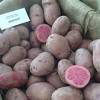

In [68]:
img = open_image(path/'potatoe'/'2.jpg')
img

我们在这样的生产环境下创建`学习器`，只需确保`path`参数包含了前面生成好的“export.pk1”文件。

In [69]:
learn = load_learner(path)

In [70]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category tensor(1)

你可能需要像下面的代码这样，创建一个路径, ([谢谢](https://github.com/simonw/cougar-or-not)Simon Willison提供了这些代码的架构）：

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)<br>

（这个例子适用于 [Starlette](https://www.starlette.io/)的web app工具包）

## Things that can go wrong 可能出错的地方

- Most of the time things will train fine with the defaults   
大多数时候使用默认参数就能训练出好模型

- There's not much you really need to tune (despite what you've heard!)   
没有太多需要你去调整的（尽管你可能听到过一些）

- Most likely are   
可能就是(下面的参数)
  - Learning rate   学习率
  - Number of epochs   epochs的数目

### Learning rate (LR) too high 学习率(LR)太高

In [71]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [72]:
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,1.476919,26.797554,0.411765,00:01


### Learning rate (LR) too low 学习率(LR)太低

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Previously we had this result:<br> 

前面的代码运行后，我们得到如下结果：

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [ ]:
learn.fit_one_cycle(5, max_lr=1e-5)

In [ ]:
learn.recorder.plot_losses()

As well as taking a really long time, it's getting too many looks at each image, so may overfit.<br>

不仅运行耗时过长，而且模型对每一个图片都太过注重细节，因此可能过拟合。

### Too few epochs     epochs过少

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [ ]:
learn.fit_one_cycle(1)

### Too many epochs     epochs过多

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))